### Import dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


### Variable Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


There are 6 total variables and 1014 observations per variable.

**Predictor variables**

Age: Age in years when a woman is pregnant.

SystolicBP: Upper value of blood Pressure in mmHg.

DiastolicBP: Lower value of blood Pressure in mmHg,

BS: Blood glucose levels units molar concentration, mmol/L.

BodyTemp: Body temperature in degrees F.

HeartRate: A normal resting heart rate in beats per minute.

**Target variable**

Risk Level: Predicted risk intensity Level during pregnancy considering the previous attribute.

#### Check for missing or duplicates

In [5]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

There are no missing values in the dataset

In [6]:
print(f"There are {df.duplicated().sum()} duplicates data")
df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

There are 562 duplicates data


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
670,10,100,50,6.0,99.0,70,mid risk
849,10,100,50,6.0,99.0,70,mid risk
552,12,90,60,7.5,102.0,60,low risk
940,12,90,60,7.5,102.0,60,low risk
543,12,90,60,7.5,102.0,66,low risk
...,...,...,...,...,...,...,...
553,60,120,85,15.0,98.0,60,mid risk
772,60,120,85,15.0,98.0,60,mid risk
818,60,120,85,15.0,98.0,60,mid risk
114,63,140,90,15.0,98.0,90,high risk


### Univarite Analysis

Explore distrubtions of each single variable in the dataset first

#### Risk Level

Risk level is a categorical variable, so we can check the frequency distribution of this category using a bar, pie, or circle chart. 

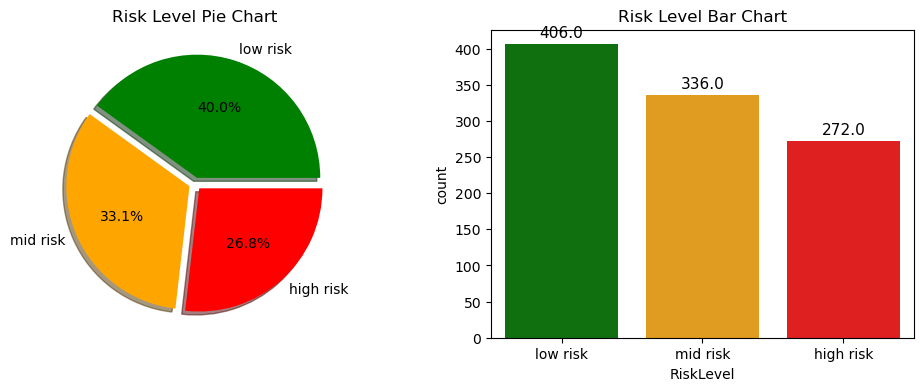

In [7]:
r_colors = ['green', 'orange', 'red']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=r_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="RiskLevel", data=df, ax=ax[1], order=risk_order, palette=r_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Risk Level Bar Chart")
plt.show()

Out of 1014 observations, we see that 406 (40%) of pregnant women have low risk, 336 (33.1%) have medium risk, and 272 (26.8%) gave high risk. It seems that most pregnant women in this dataset have low health risk, but overall there seems to be a good distribution among risk levels (i.e. not heavily skewed towards one cateogry). We will explore the data to get more insights and see why pregnant women are associated with different health risk. We can explore each predictor variable one by one first.

Since the predictor variables are all numerical, we will use a histogram instead of a bar/pie chart. We'll also pay close attention to outliers that may cause bias and/or influence estimates by using a box plot. Based on the output from the describe() function earlier there may be outliers in the age, BS, and HR variables. 

In [8]:
def num_plot(data, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])
    ax[0].set_title(f"{col} Histogram")
    ax[1].set_title(f"{col} Boxplot")

    plt.show()

#### Age

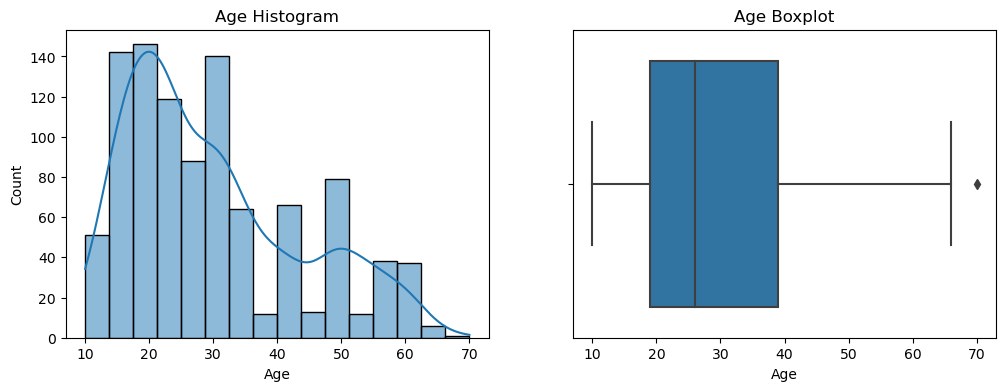

In [9]:
num_plot(df, "Age")

#### Systolic BP 

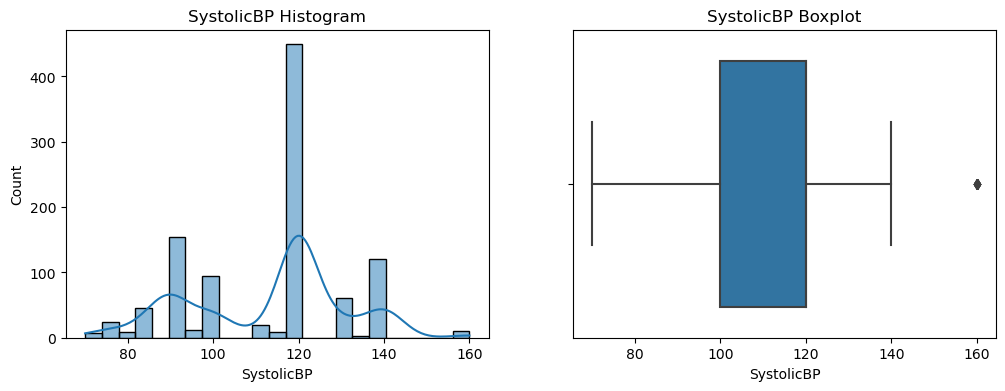

In [10]:
num_plot(df, "SystolicBP")

#### Diastolic BP 

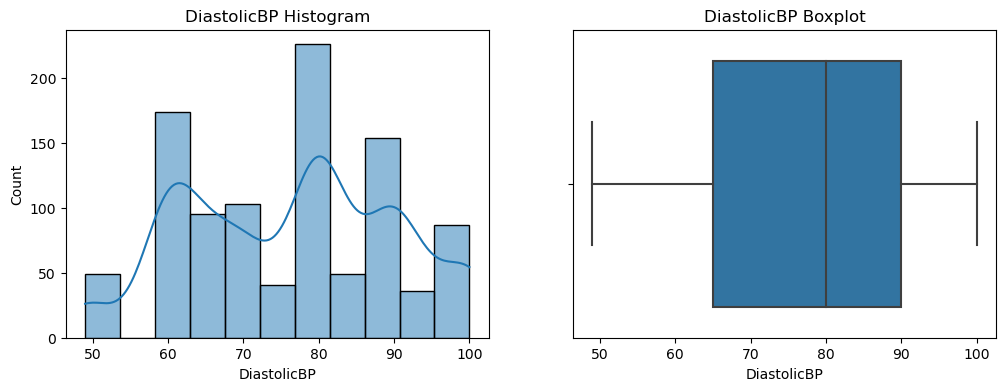

In [11]:
num_plot(df, "DiastolicBP")

#### BS

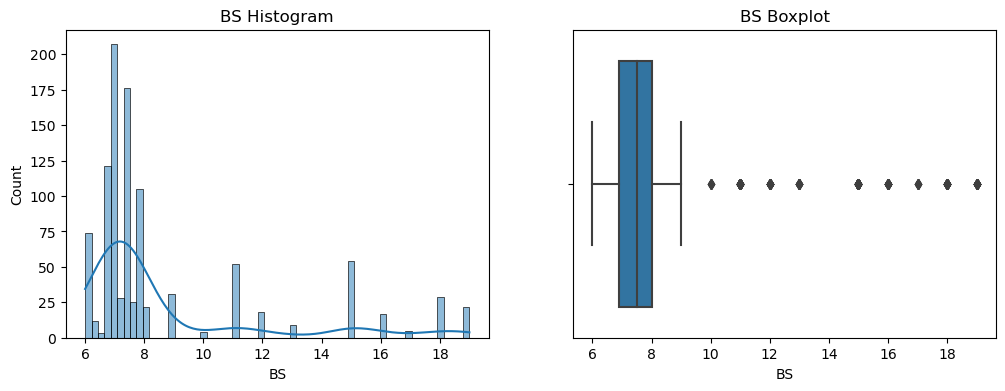

In [12]:
num_plot(df, "BS")

#### Body Temp

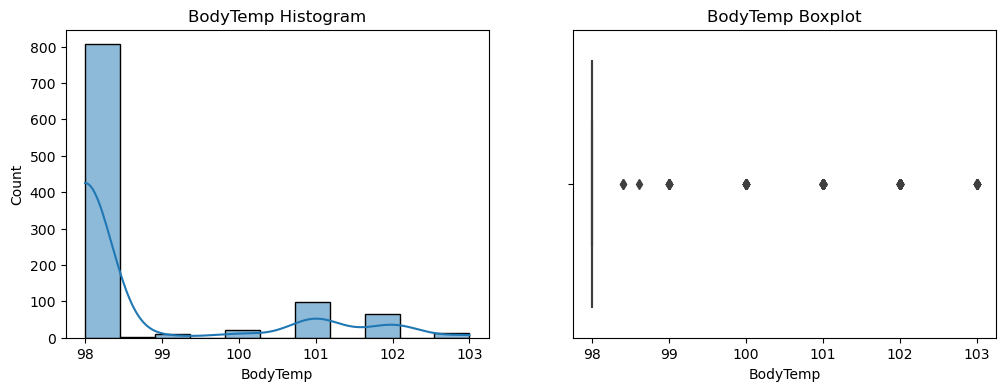

In [13]:
num_plot(df, "BodyTemp")

#### Heart Rate

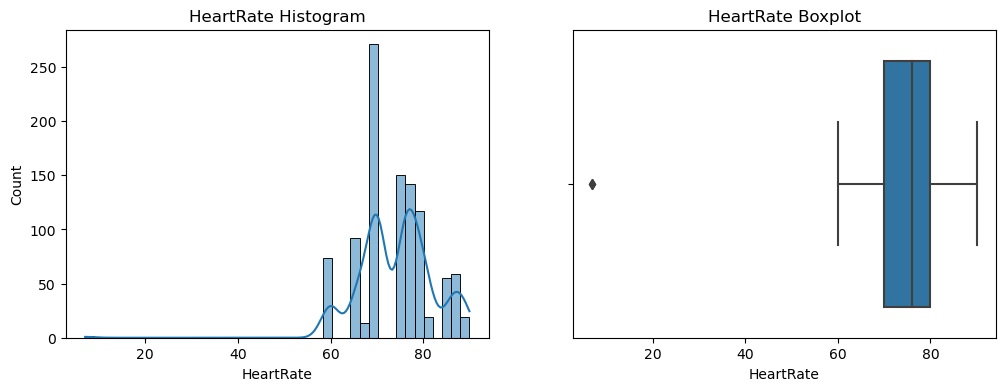

In [14]:
num_plot(df, "HeartRate")

Observation: Most of the distributions are not normally distributed, however this is expected of a few variables. For example for body temperature, we expect the large majority to be 98 deg. F since that is the normal body temperature. For age, the data is skewed towards younger ages, but a normal distribution was most likely not going to occur here based on the demographic being assessed.

It seems that almost all variables have outliers. For now, we will just ignore most of these outliers because it seems to be a natural occurrence for this data. The outlier in the heart rate variable should be removed, as that outlier has a value that is too far from the other values (perhaps an error in measurement there).

### Bivariate Analysis
We'll now perform bivariate analysis to study if a relationship exists between two variables, and if it does exsist, what the strength is of that association. We can use scatter plots to show the patterns that can be formed using the two variables (with one variable here is dependent while the other is independent) and we can use correlation coefficients to evaluate the strenght of relationship.

#### Between Predictor Variables

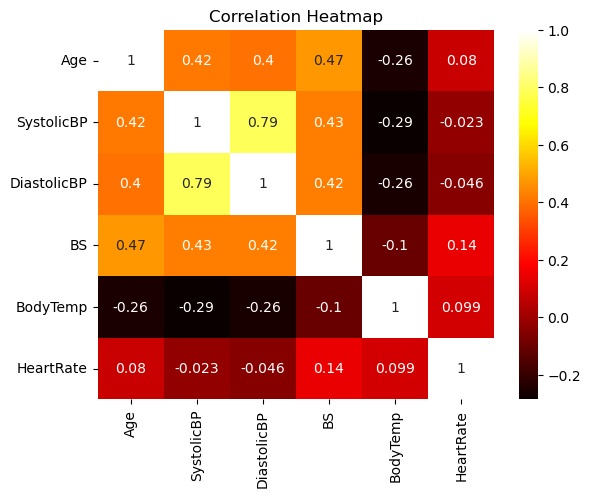

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="hot")
plt.title("Correlation Heatmap")
plt.show()

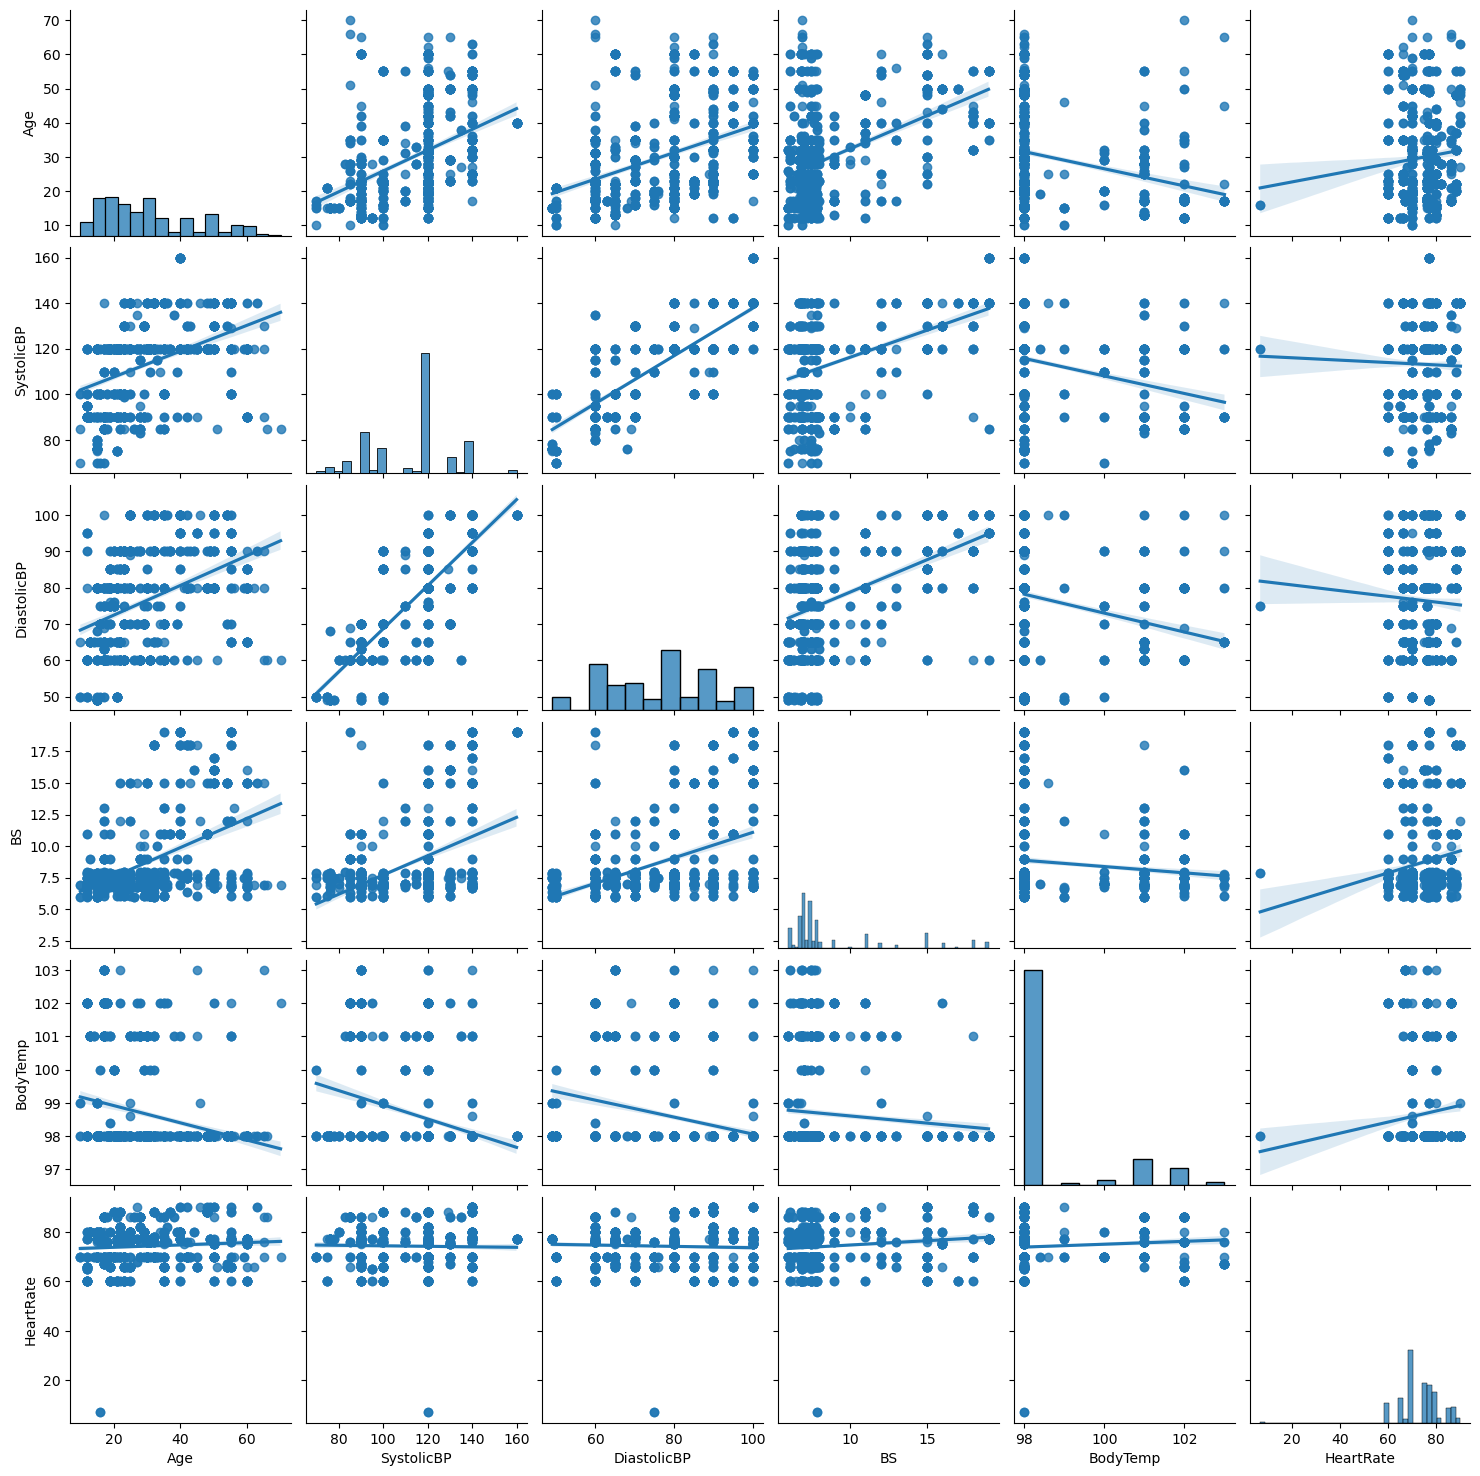

In [16]:
sns.pairplot(df,kind="reg")
plt.show()

From these plots it appears that SystolicBP and DiastolicBP are highly correlated, as they have positive correlation with a correlation coefficient value = 0.79. This indicates that SystolicBP and DiastolicBP variable contain highly similar information and there is very little or no variance in information. Therefore, we can remove one of these variables as we typically don't want to include redundant information while making or training our model

#### Between Predictor and Target
For each target variable, we can visualize the resulting risk level data distribution using a histogram. We can also use pandas crosstab to see the detailed values.

**Age & Risk Level**

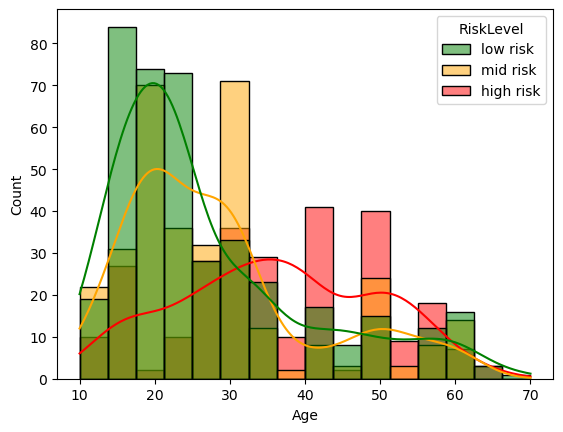

In [17]:
sns.histplot(data=df, x="Age", hue="RiskLevel", kde=True,hue_order=risk_order,palette=r_colors)
plt.show()

In [18]:
pd.crosstab(df.RiskLevel, df.Age).style.background_gradient(cmap='summer_r')

Age,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,54,55,56,59,60,62,63,65,66,70
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,7,3,3,0,0,24,0,2,0,0,5,5,0,21,0,2,5,8,10,0,18,2,3,22,2,6,2,2,34,0,4,3,0,1,1,16,2,22,0,9,17,1,0,7,0,2,1,0,0
low risk,2,15,2,0,56,10,18,8,28,11,27,28,42,3,16,0,5,7,2,6,7,18,0,2,21,0,0,0,0,1,1,15,0,0,8,0,4,5,5,1,0,12,0,2,13,1,0,2,1,1
mid risk,2,13,7,0,4,6,21,11,37,11,11,12,24,0,11,3,2,16,30,14,15,12,3,0,7,2,0,0,2,2,0,4,2,3,0,0,6,2,16,0,3,8,0,0,14,0,0,0,0,0


Observation: Pregnant women less than 25 years old mostly have low health risk, and health risk begins to increase at age 25. The health risk of women 59 and older seem to be decreased, though there is less data here so that is not conclusive.

**Systolic BP & Risk Level**

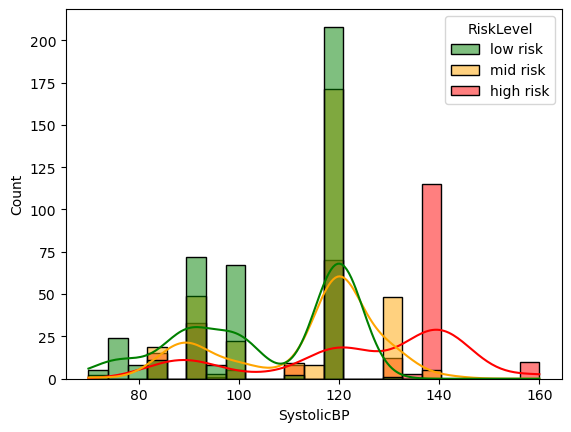

In [19]:
sns.histplot(data=df, x="SystolicBP", hue="RiskLevel", kde=True,hue_order=risk_order,palette=r_colors)
plt.show()

In [20]:
pd.crosstab(df.RiskLevel, df.SystolicBP).style.background_gradient(cmap='summer_r')

SystolicBP,70,75,76,78,80,83,85,90,95,99,100,110,115,120,129,130,135,140,160
RiskLevel,,,,,,,,,,,,,,,,,,,
high risk,0,0,0,0,0,2,13,33,1,0,5,8,0,70,0,12,3,115,10
low risk,5,8,16,3,5,0,11,72,8,2,65,2,0,208,1,0,0,0,0
mid risk,2,0,0,0,0,0,19,49,3,0,22,9,8,171,0,48,0,5,0


Observation: It seems that the higher the systolic BP, the higher the health risk, with an increase in health risk occuring above 100 mmHg.

**Diastolic BP & Risk Level**

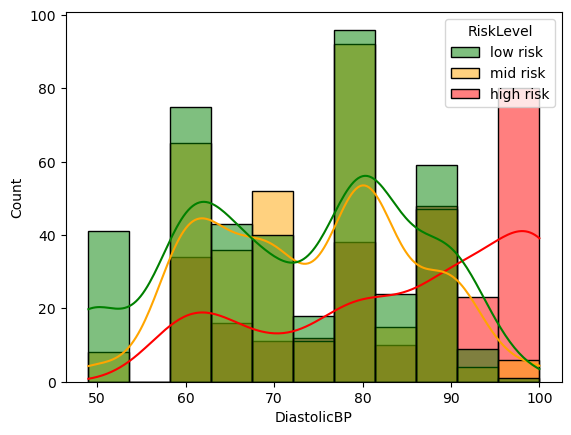

In [21]:
sns.histplot(data=df, x="DiastolicBP", hue="RiskLevel", kde=True,hue_order=risk_order,palette=r_colors)
plt.show()

In [22]:
pd.crosstab(df.RiskLevel, df.DiastolicBP).style.background_gradient(cmap='summer_r')

DiastolicBP,49,50,60,63,65,68,69,70,75,76,80,85,89,90,95,100
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,0,34,2,14,0,1,10,12,0,38,10,0,48,23,80
low risk,25,16,75,2,41,2,0,38,15,3,96,24,1,58,9,1
mid risk,0,8,65,4,32,0,0,52,11,0,92,15,0,47,4,6


Observation: Similar to systolic BP, as expected from the correlation, where the higher the diastolic BP the higher the health risk.

**BS & Risk Level**

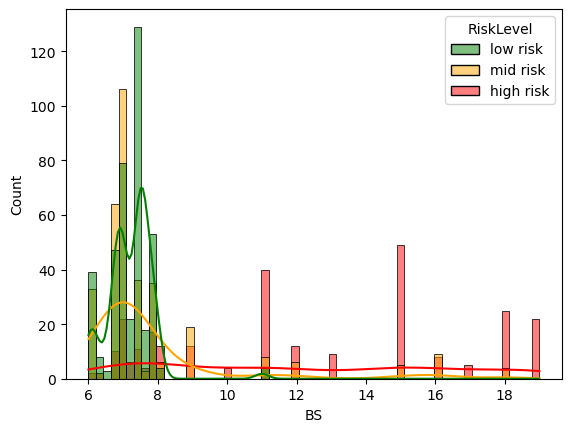

In [23]:
sns.histplot(data=df, x="BS", hue="RiskLevel", kde=True,hue_order=risk_order,palette=r_colors)
plt.show()

In [24]:
pd.crosstab(df.RiskLevel, df.BS).style.background_gradient(cmap='summer_r')

BS,6.000000,6.100000,6.300000,6.400000,6.500000,6.600000,6.700000,6.800000,6.900000,7.000000,7.010000,7.100000,7.200000,7.500000,7.600000,7.700000,7.800000,7.900000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,15.000000,16.000000,17.000000,18.000000,19.000000
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,2,2,0,0,0,0,10,8,9,5,0,6,11,0,4,5,12,12,12,4,40,12,9,49,8,5,25,22
low risk,7,32,0,8,1,2,10,37,47,29,3,8,14,129,1,17,19,34,4,0,0,4,0,0,0,0,0,0,0
mid risk,14,19,0,2,0,0,23,41,58,41,7,0,0,36,0,3,21,14,6,19,0,8,6,0,5,9,0,4,0


Observation: Nearly all women with blood glucose levels >= 8 have high health risk. Otherwise, they mostly have lower health risk.

**Body Temp & Risk Level**

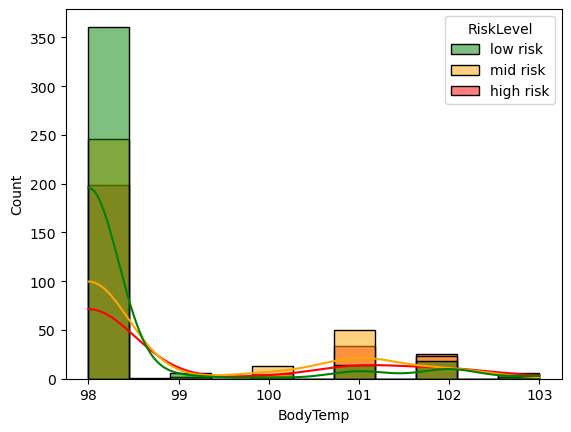

In [25]:
sns.histplot(data=df, x="BodyTemp", hue="RiskLevel", kde=True,hue_order=risk_order,palette=r_colors)
plt.show()

In [26]:
pd.crosstab(df.RiskLevel, df.BodyTemp).style.background_gradient(cmap='summer_r')

BodyTemp,98.000000,98.400000,98.600000,99.000000,100.000000,101.000000,102.000000,103.000000
RiskLevel,,,,,,,,
high risk,199,0,1,2,5,34,25,6
low risk,359,2,0,6,2,14,18,5
mid risk,246,0,0,2,13,50,23,2


Observation: Pregnant women with a body temperature >= 100 deg. F mostly have higher health risk. Most women have a body temp of 98 deg. F (which is normal), and there are still many high risk women who have that body temp. so it's hard to say that body temp is a strong predictor of health risk.

**Heart Rate & Risk Level**

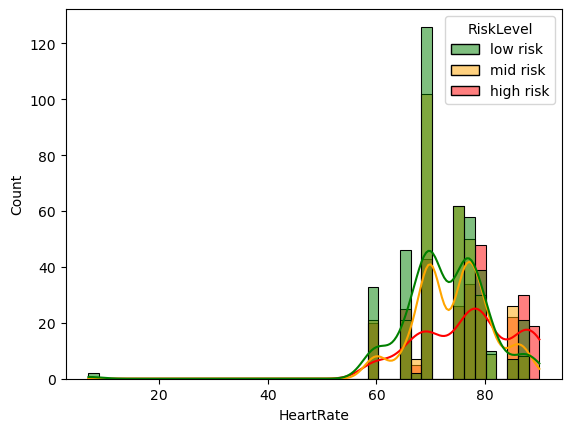

In [27]:
sns.histplot(data=df, x="HeartRate", hue="RiskLevel", kde=True,hue_order=risk_order,palette=r_colors)
plt.show()

In [28]:
pd.crosstab(df.RiskLevel, df.HeartRate).style.background_gradient(cmap='summer_r')

HeartRate,7,60,65,66,67,68,70,75,76,77,78,80,82,86,88,90
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,20,0,25,5,0,43,6,20,25,9,48,0,22,30,19
low risk,2,33,2,44,2,0,126,7,55,56,2,39,10,7,21,0
mid risk,0,21,3,18,5,2,102,6,56,15,35,30,9,26,8,0


Observation: Health risk seems increase with higher heart rates.

### Multivariate Analysis
With multivariate analysis we will try to associate more than one predictor variable with the response variable. Here, we will just analyze the impact of 2 different predictor variables at a time on the risk level outcome. 

**Age + Systolic BP**

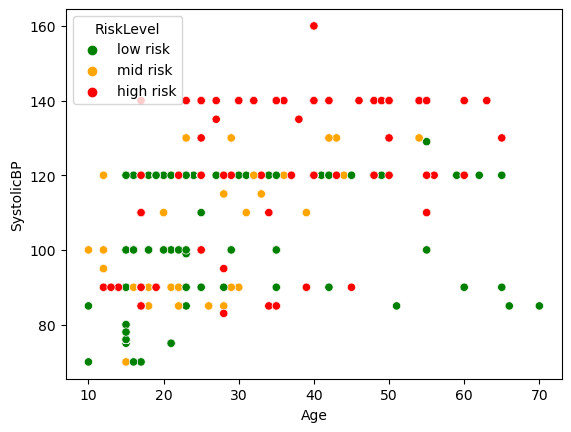

In [29]:
sns.scatterplot(data=df, x="Age", y="SystolicBP", hue="RiskLevel", hue_order=risk_order, palette=r_colors)
plt.show()

Observation: Pregnant women with high SystolicBP, regardless of their age, seem to have a high health risk. Having low SystolicBP at a young age (under 50 years) does not guarantee our health risk is low, having it at an older age (> 50 years) seems to make health risks lower.

**Age + Diastolic BP**

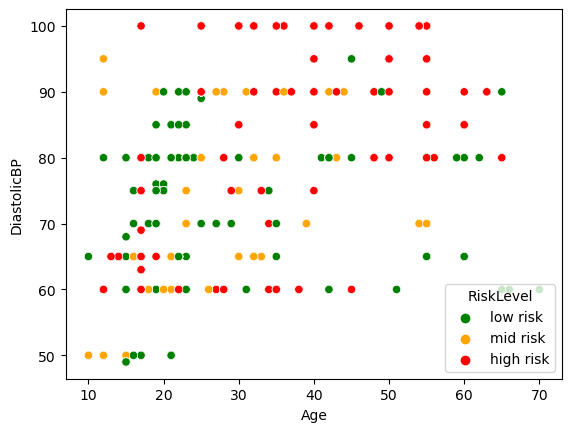

In [30]:
sns.scatterplot(data=df, x="Age", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=r_colors)
plt.show()

Similar to systolic BP

**Age + BS BP**

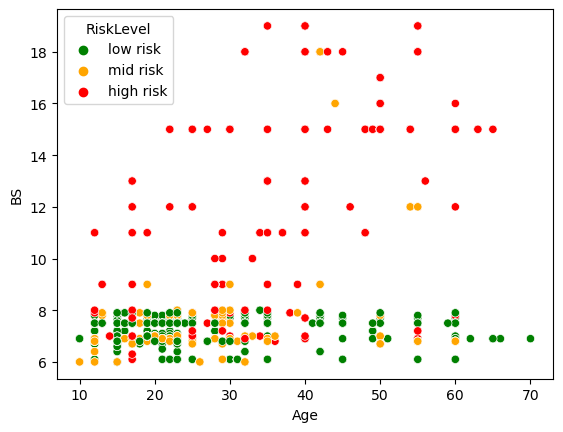

In [31]:
sns.scatterplot(data=df, x="Age", y="BS", hue="RiskLevel", hue_order=risk_order, palette=r_colors)
plt.show()

Observation: Pregnant women with high blood sugar, regardless of their age, seem to have a high health risk. 

**Age + BodyTemp**

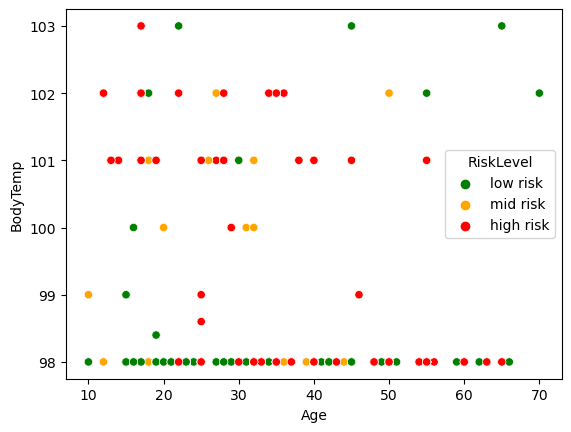

In [32]:
sns.scatterplot(data=df, x="Age", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=r_colors)
plt.show()

Observation: Younger women with normal body temp. mostly have low health risk, but they'll have higher risk if they have high body temperature. High body temps. for older women don't appear to significantly affect health risk level.

**Age + Heart Rate**

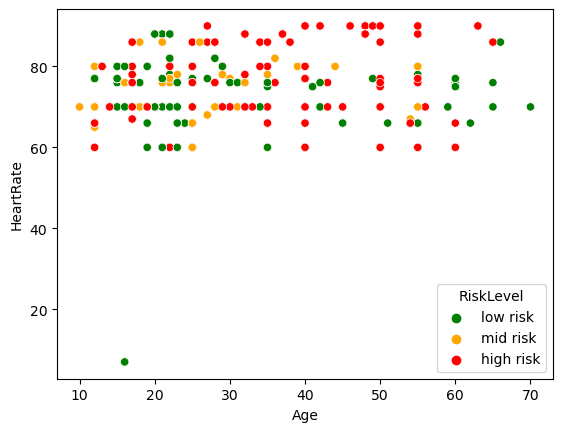

In [33]:
sns.scatterplot(data=df, x="Age", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=r_colors)
plt.show()

Observation: It seems like heart rate has less of an effect on risk level age does.

**Systolic BP + Diastolic BP**

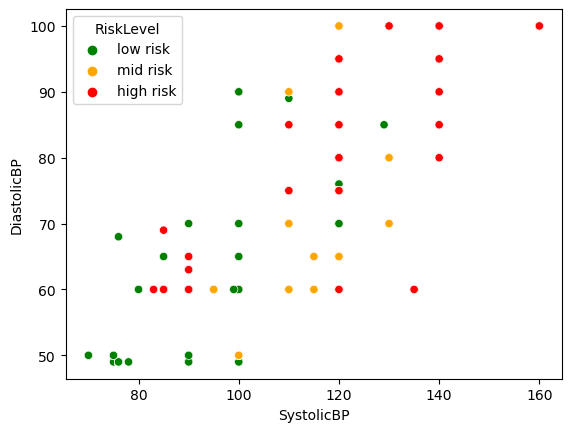

In [34]:
sns.scatterplot(data=df, x="SystolicBP", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=r_colors)
plt.show()

Observation: Higher systolic and diastolic BP seem to have higher health risk. 

**Systolic BP + BS**

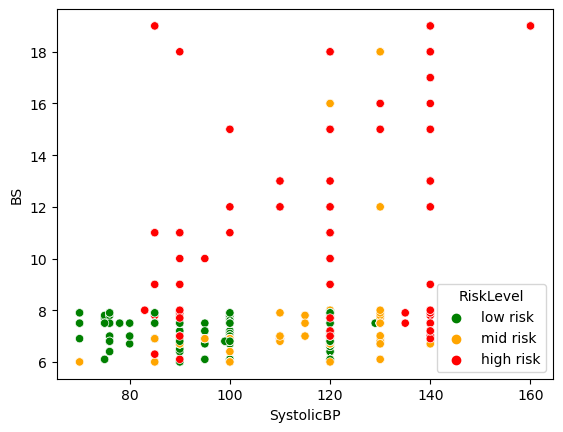

In [35]:
sns.scatterplot(data=df, x="SystolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=r_colors)
plt.show()

Observation: Higher blood sugar and systolic BP seem to have higher health, although having higher blood sugar seems to have more of an effect.

**Systolic BP + Body Temp**

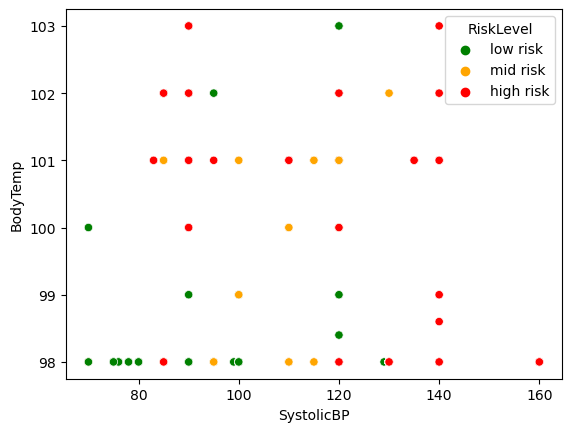

In [36]:
sns.scatterplot(data=df, x="SystolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=r_colors)
plt.show()

Observation: Women with normal body temp. and lower systolic BP seem to have lower health risk. Having higher systolic BP seems to have a higher health risk association regardless of body temp. 

**Systolic BP + Heart Rate**

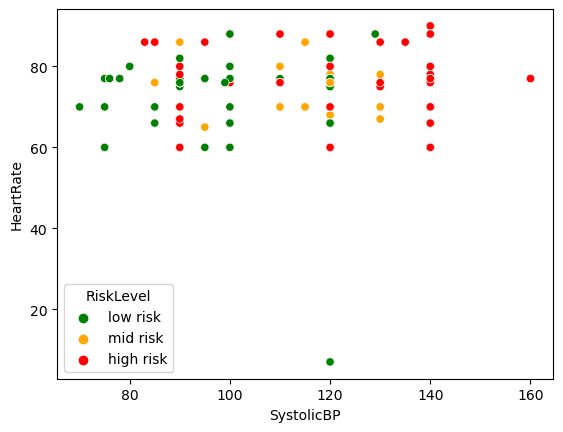

In [37]:
sns.scatterplot(data=df, x="SystolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=r_colors)
plt.show()

Observation: Heart rate does not seem to have as much as an effect on risk level as systolic BP does.

**Diastolic BP + BS**

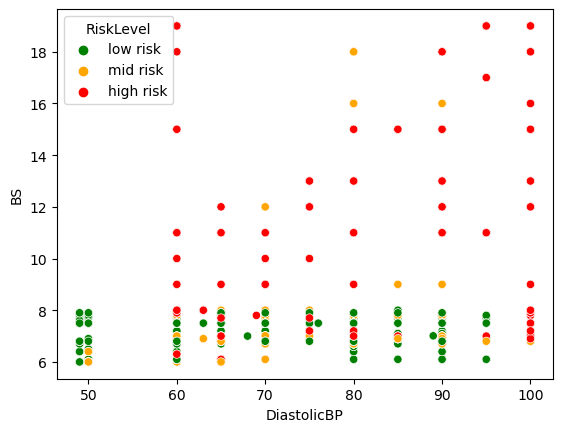

In [38]:
sns.scatterplot(data=df, x="DiastolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=r_colors)
plt.show()

Observation: High blood sugar seems to indicate high risk regardless of diastolic BP.

**Diastolic BP + Body Temp**

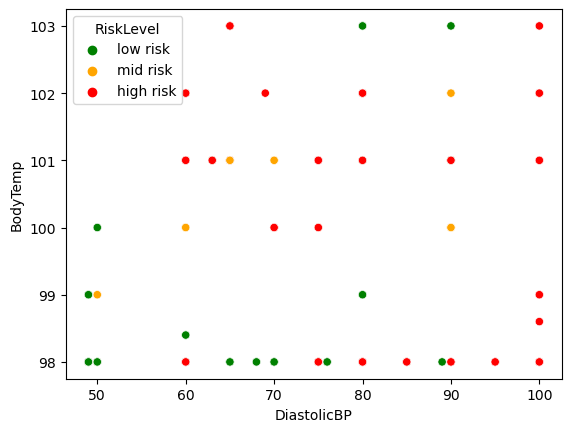

In [39]:
sns.scatterplot(data=df, x="DiastolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=r_colors)
plt.show()

Observation: Low diastolic BP + normal body temperature seem to have low health risk, health risk increases with higher body temp.

**Diastolic BP + Heart Rate**

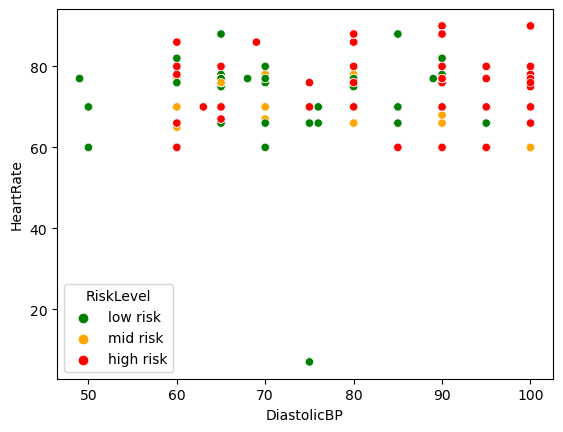

In [40]:
sns.scatterplot(data=df, x="DiastolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=r_colors)
plt.show()

Observation: Again, heart rate doesn't seem to have a great effect.

**BS + Body Temp**

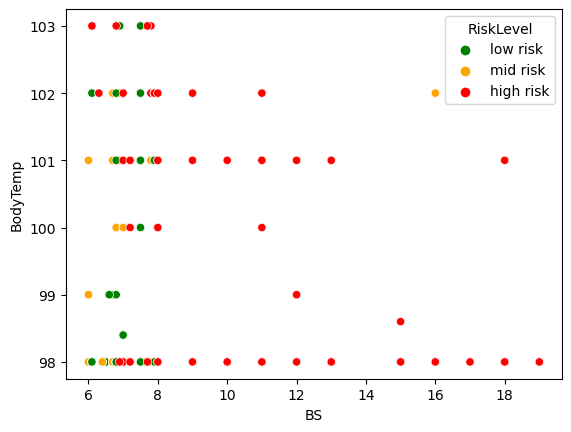

In [41]:
sns.scatterplot(data=df, x="BS", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=r_colors)
plt.show()

Observation: High blood sugar seems to indicate high risk regardless of body temp.

**BS + Heart Rate**

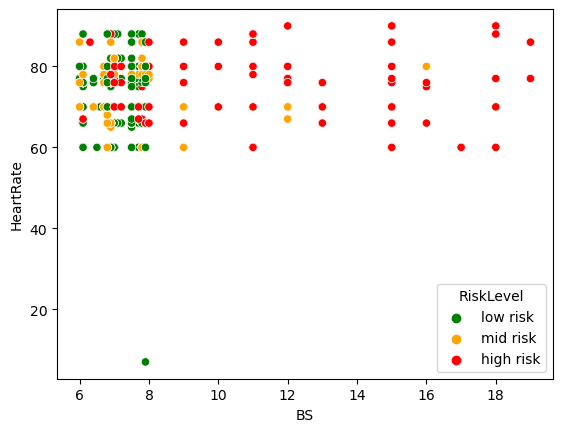

In [42]:
sns.scatterplot(data=df, x="BS", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=r_colors)
plt.show()

Observation: High blood sugar seems to indicate high risk regardless of heart rate.

**Body Temp + Heart Rate**

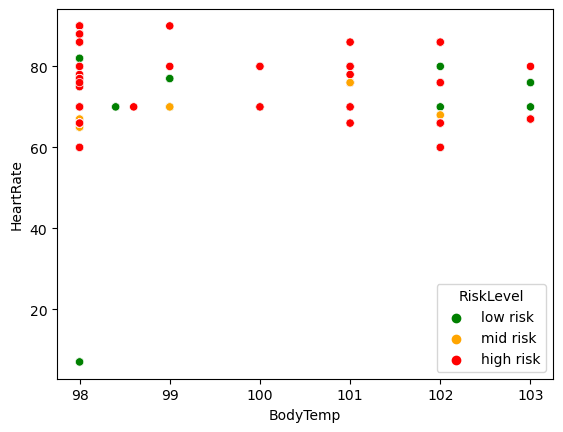

In [43]:
sns.scatterplot(data=df, x="BodyTemp", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=r_colors)
plt.show()

Observation: Pregnant women with higher body temp. seem to have a higher health risk, regardless of heart rate

### Overall Takeaways

**On Outliers**
We saw that several variables in this dataset contain outliers, but even so, most of those values still make sense in real life. The only variable that has an outlier with an unreasonable value is heart rate, where two observations had a heart rate value of 7 bpm (beats per minute), which is way below normal (60-100 bpm). It's likely these were measurement erros, and so we will drop these 2 outlier points.

**On Removing Features**
After conducting several analyses on the predictor variables, it seems reasonable to conclude that the heart rate variable is less helpful in determining the health risks of pregnant women, and we can therefore remove that variable when building our training set data.

We also saw that diastolic BP and systolic BP are highly correlated and give similar results in the bi and multi-variate analyses. We can play around with keeping both variables or keeping just one and seeing if there is an effect on training.

In [44]:
df_proc = df.drop(df.index[df.HeartRate == 7])
df_proc = df_proc.drop(["HeartRate"], axis=1)

In [45]:
df_proc.to_csv('../data/processed_data.csv')